# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=b62fad0a26da7e8772264ef3cb68b5a0&units=imperial&q=


## Generate Cities List

In [89]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=25)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

24

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [90]:
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

x=0
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        x=x+1
        print(f"Pulling data for {x} | {city}")
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except KeyError: 
        print("data not found")

Pulling data for 1 | punta arenas
Pulling data for 2 | samusu
data not found
Pulling data for 3 | adrar
Pulling data for 4 | carnarvon
Pulling data for 5 | touros
Pulling data for 6 | gambela
Pulling data for 7 | necochea
Pulling data for 8 | rungata
data not found
Pulling data for 9 | mataura
Pulling data for 10 | albany
Pulling data for 11 | hermanus
Pulling data for 12 | karratha
Pulling data for 13 | rikitea
Pulling data for 14 | san patricio
Pulling data for 15 | severo-kurilsk
Pulling data for 16 | cape town
Pulling data for 17 | luderitz
Pulling data for 18 | ola
Pulling data for 19 | kohlu
Pulling data for 20 | tuktoyaktuk
Pulling data for 21 | kaitangata
Pulling data for 22 | busselton
Pulling data for 23 | castro
Pulling data for 24 | new norfolk


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [91]:
#Create the data frame 
export_frame = pd.DataFrame({
        "City":city_name,
        "Lat":lat,
        "Lng":lng,
        "Max Temp":max_temp,
        "Humidity":humidity,
        "Cloudiness":cloudiness,
        "Wind Speed":wind_speed,
        "Country":country,
        "Date":date 
})
#Export the data to a .csv file 
export_frame.to_csv("city_weather.csv", index = False)
#Display the data frame
export_frame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,42.80,87,90,11.41,CL,1603562428
1,Adrar,20.50,-10.07,95.34,9,5,7.38,MR,1603562694
2,Carnarvon,-24.87,113.63,69.80,94,0,14.99,AU,1603562694
3,Touros,-5.20,-35.46,86.00,58,40,16.11,BR,1603562694
4,Gambēla,8.25,34.58,74.44,89,63,2.59,ET,1603562694
5,Necochea,-38.55,-58.74,69.39,67,73,8.66,AR,1603562694
6,Mataura,-46.19,168.86,64.99,56,100,14.00,NZ,1603562694
7,Albany,42.60,-73.97,59.00,65,87,3.00,US,1603562695
8,Hermanus,-34.42,19.23,62.01,89,77,4.90,ZA,1603562695
9,Karratha,-20.74,116.85,67.30,89,0,10.54,AU,1603562680


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [95]:
#  Get the indices of cities that have humidity over 100%
df2 = export_frame.loc[export_frame["Humidity"] > 100]
df2

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [93]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

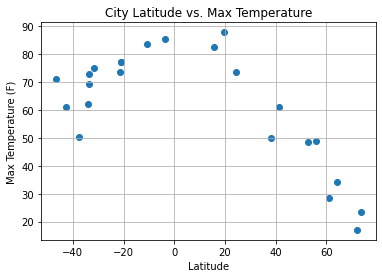

In [66]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Max Temp"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Humidity Plot

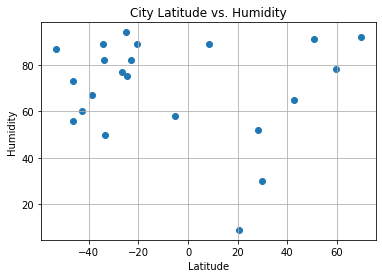

In [101]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Humidity"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Cloudiness Plot

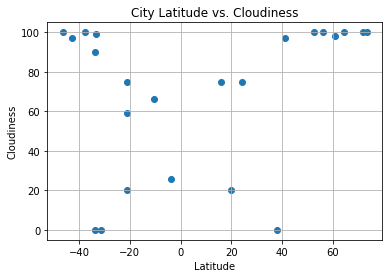

In [67]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Cloudiness"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Wind Speed Plot

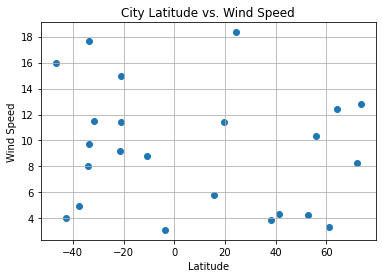

In [68]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Wind Speed"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

## Linear Regression

In [102]:
northern_hemisphere = export_frame.loc[export_frame["Lat"] >= 0,:]

southern_hemisphere = export_frame.loc[export_frame["Lat"] < 0,:]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,42.80,87,90,11.41,CL,1603562428
2,Carnarvon,-24.87,113.63,69.80,94,0,14.99,AU,1603562694
3,Touros,-5.20,-35.46,86.00,58,40,16.11,BR,1603562694
5,Necochea,-38.55,-58.74,69.39,67,73,8.66,AR,1603562694
6,Mataura,-46.19,168.86,64.99,56,100,14.00,NZ,1603562694
8,Hermanus,-34.42,19.23,62.01,89,77,4.90,ZA,1603562695
9,Karratha,-20.74,116.85,67.30,89,0,10.54,AU,1603562680
10,Rikitea,-23.12,-134.97,74.70,82,94,22.88,PF,1603562695
13,Cape Town,-33.93,18.42,64.00,82,0,11.41,ZA,1603562695
14,Lüderitz,-26.65,15.16,61.03,77,0,10.78,NA,1603562696


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8054530126602485


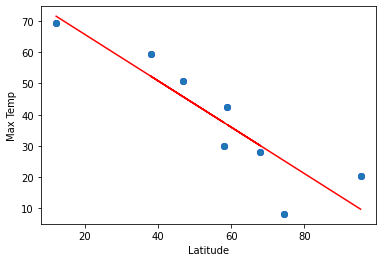

In [103]:
x_values = northern_hemisphere["Max Temp"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.683822614794972


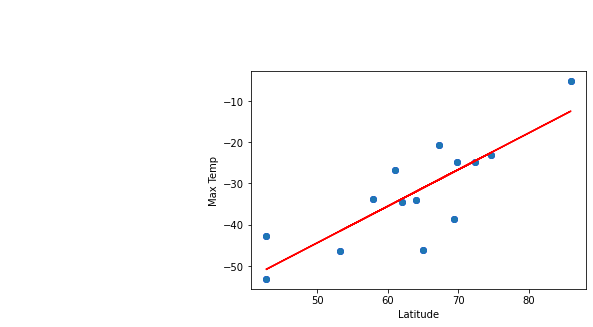

In [104]:
x_values = southern_hemisphere["Max Temp"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23169669699630988


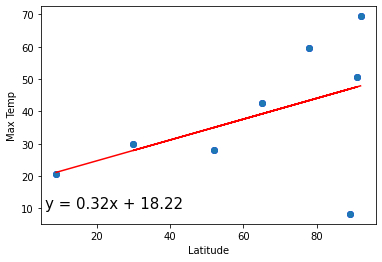

In [105]:
x_values = northern_hemisphere["Humidity"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004683412500222982


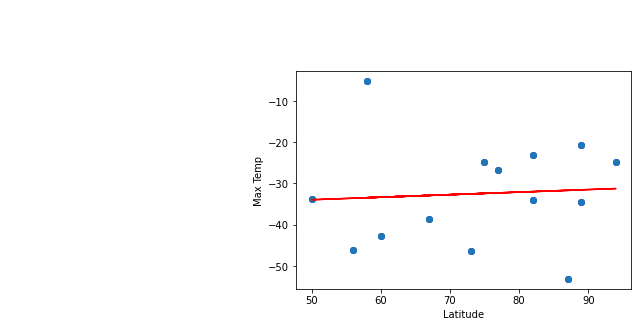

In [106]:
x_values = southern_hemisphere["Humidity"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12963989614878874


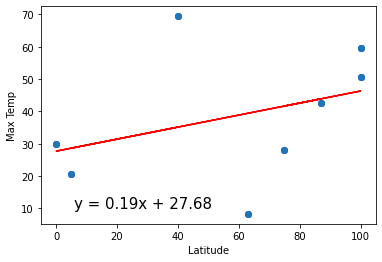

In [107]:
x_values = northern_hemisphere["Cloudiness"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16183739137140324


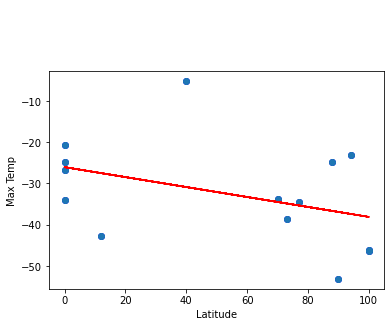

In [108]:
x_values = southern_hemisphere["Cloudiness"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0705959377092828


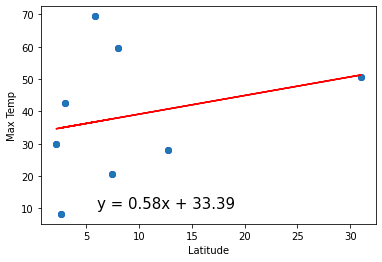

In [109]:
x_values = northern_hemisphere["Wind Speed"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08235932036533376


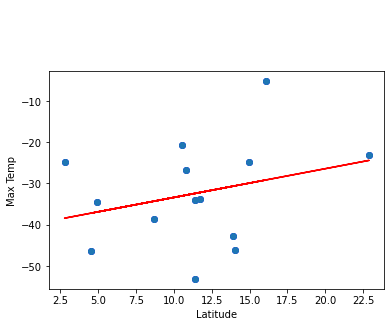

In [110]:
x_values = southern_hemisphere["Wind Speed"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()